# Подключение библиотек и определение глобальных переменнных

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import squareform, pdist
from sklearn.datasets import fetch_openml

# KMeans
from sklearn.cluster import KMeans

# Построение иерархической кластеризации
from scipy.cluster.hierarchy import (
    linkage, 
    fcluster, 
    dendrogram
)

# Оценки качества кластеризации
from sklearn.metrics import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)

# Визуализация
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')


#Количество изображений для обучения
IMAGES_TO_FEED = 1000

# Загрузка данных

In [ ]:
mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = mnist

X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Перемешивание данных**

In [ ]:
X = X.sample(frac=1)
X = X.head(IMAGES_TO_FEED)
y = y[X.index]

# Определение функций для KMeans и иерархической кластеризации

In [ ]:
def kmeans_cluster(X, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    return labels


def hierarchical_cluster(X, distance_matrix, n_clusters=10, method='ward'):
    Z = linkage(distance_matrix, method=method)
    labels = fcluster(Z, t=n_clusters, criterion='maxclust')
    return Z, labels

# Получение меток из алгоритмов кластеризации

In [ ]:
kmeans_labels = kmeans_cluster(X)

distance_matrix = squareform(pdist(X)) # Вычисление матрицы расстояний между изображениями
Z, hierarchical_labels = hierarchical_cluster(X, distance_matrix)

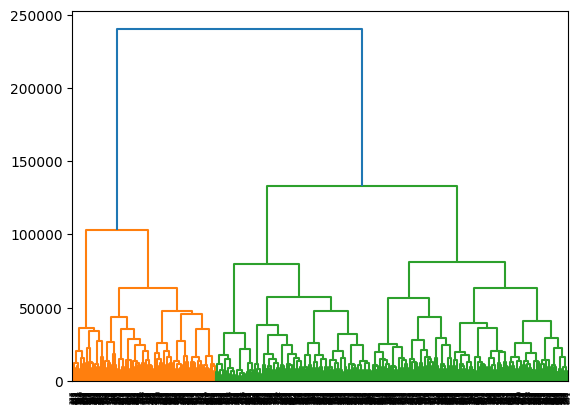

In [ ]:
dendro = dendrogram(Z)

# Вычисляем данные и строим кривую зависимости интеркластерного расстояния от числа кластеров

In [ ]:
max_num_clusters = len(X) + 1
step = max_num_clusters // 30
num_clusters_values = np.arange(1, max_num_clusters, step)

# Вычисляем интеркластерное расстояние для каждого значения числа кластеров
cluster_distances = []
for num_clusters in num_clusters_values:
    cluster_distances.append(Z[-num_clusters, 2])

# Строим кривую интеркластерного расстояния
fig = go.Figure()
fig.add_trace(go.Scatter(x=num_clusters_values, y=cluster_distances))
fig.update_layout(title='Кривая интеркластерного расстояния', xaxis_title='Число кластеров', yaxis_title='Интеркластерное расстояние')
fig.show()

# Сравнение двух методов кластеризации по разным метрикам

* Adjusted Rand Index (ARI) - метрика, которая измеряет сходство между двумя кластерными разбиениями и выдает значение между -1 и 1, где 1 означает идеальное сходство, 0 - случайное разбиение, а -1 - полное несходство.

* Normalized Mutual Information (NMI) - метрика, которая также измеряет сходство между двумя кластерными разбиениями, но она использует взаимную информацию между ними. Значение NMI также находится между 0 и 1, где 1 означает идеальное сходство.

* Silhouette Score - метрика, которая оценивает качество кластеризации, вычисляя среднее значение силуэтов всех объектов. Силуэт оценивает, насколько хорошо объект находится в своем кластере, по сравнению с другими кластерами. Значение силуэта находится между -1 и 1, где 1 означает, что объект находится в правильном кластере, а -1 - что он находится в неправильном.

* Calinski-Harabasz Index - метрика, которая измеряет отношение между внутрикластерными расстояниями и межкластерными расстояниями. Чем выше значение, тем лучше кластеризация.

* Davies-Bouldin Index - метрика, которая измеряет среднее расстояние между центроидами кластеров и сравнивает его с суммой внутрикластерных расстояний. Чем меньше значение, тем лучше кластеризация.




In [ ]:
true_labels = y
predicted_labels = kmeans_labels

kmeans_data = {
  "Adjusted Rand Index": adjusted_rand_score(true_labels, predicted_labels),
  "Normalized Mutual Information": normalized_mutual_info_score(true_labels, predicted_labels),
  "Silhouette Score": silhouette_score(X, predicted_labels),
  "Calinski-Harabasz Index ": calinski_harabasz_score(X, predicted_labels),
  "Davies-Bouldin Index": davies_bouldin_score(X, predicted_labels)
}

df = pd.DataFrame(kmeans_data, index=['Значение'])
df

,Adjusted Rand Index,Normalized Mutual Information,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
Значение,0.414558,0.535157,0.071699,40.290779,2.83806


In [ ]:
predicted_labels = hierarchical_labels

hierarchical_data = {
  "Adjusted Rand Index": adjusted_rand_score(true_labels, predicted_labels),
  "Normalized Mutual Information": normalized_mutual_info_score(true_labels, predicted_labels),
  "Silhouette Score": silhouette_score(X, predicted_labels),
  "Calinski-Harabasz Index ": calinski_harabasz_score(X, predicted_labels),
  "Davies-Bouldin Index": davies_bouldin_score(X, predicted_labels)
}

df = pd.DataFrame(hierarchical_data, index=['Значение'])
df

,Adjusted Rand Index,Normalized Mutual Information,Silhouette Score,Calinski-Harabasz Index,Davies-Bouldin Index
Значение,0.260392,0.418766,0.010323,27.544735,4.421282
